<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HPE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Leer la data

In [205]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("Evaluation.csv")

#Explorando la data

In [206]:
train_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16935,335000.0,2,1.75,1060,1202,2.0,0,bad,acceptable,7,760,300,2003,0,98136,47.5426,-122.388,1060,1493
1,499,437500.0,3,2.50,2120,4500,2.0,0,bad,acceptable,7,2120,0,2000,0,98065,47.5322,-121.880,2530,4816
2,14192,1005000.0,3,2.50,2570,5000,1.0,0,bad,good,8,1480,1090,1940,0,98105,47.6578,-122.285,2420,5484
3,5666,1600000.0,3,2.50,2850,19593,1.5,1,fantastic,acceptable,10,1790,1060,1978,0,98008,47.5894,-122.111,2850,18782
4,11015,186000.0,3,1.75,1460,7967,1.0,0,bad,acceptable,7,1040,420,1977,0,98023,47.3199,-122.374,1460,6835


In [207]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,10834.771433,5.399958e+05,3.368243,2.113385,2079.628055,1.510525e+04,1.494666,0.007294,7.659844,1786.855207,292.772849,1970.971586,85.514398,98078.080344,47.560525,-122.214107,1985.357629,12712.953024
std,6237.186244,3.646536e+05,0.934019,0.769465,917.994443,4.215087e+04,0.540669,0.085096,1.177113,828.180612,442.699016,29.383190,404.236968,53.407807,0.138310,0.140878,685.955695,27257.274694
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,5434.000000,3.223000e+05,3.000000,1.500000,1420.000000,5.037500e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472400,-122.329000,1480.000000,5100.000000
50%,10875.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1830.000000,7620.000000
75%,16222.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.065350e+04,2.000000,0.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2360.000000,10076.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Se puede observar que yr_renovated tiene un valor igual a cero, significa que no a sido renovado. Ahí, existen valores faltantes

In [208]:
def mostrarHistograma (dataset, col):
  plt.figure(figsize=(10,6))
  sns.histplot(dataset[col],kde=True)
  plt.title(f"Distibución de {col}")
  plt.xlabel(col)
  plt.ylabel("Frecuencia")
  plt.show()

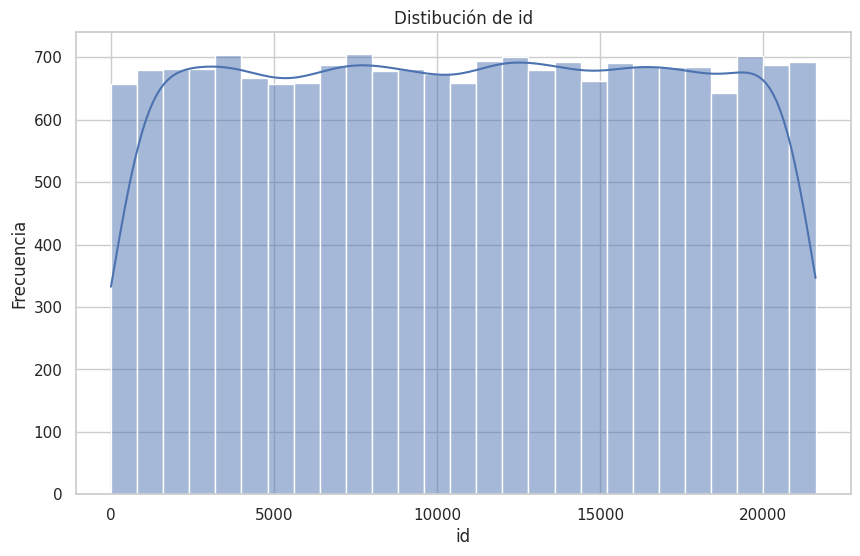

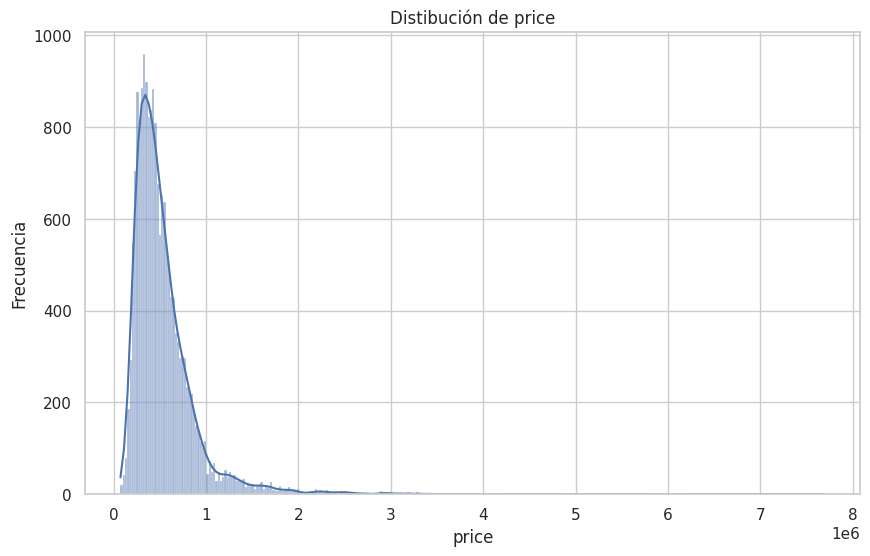

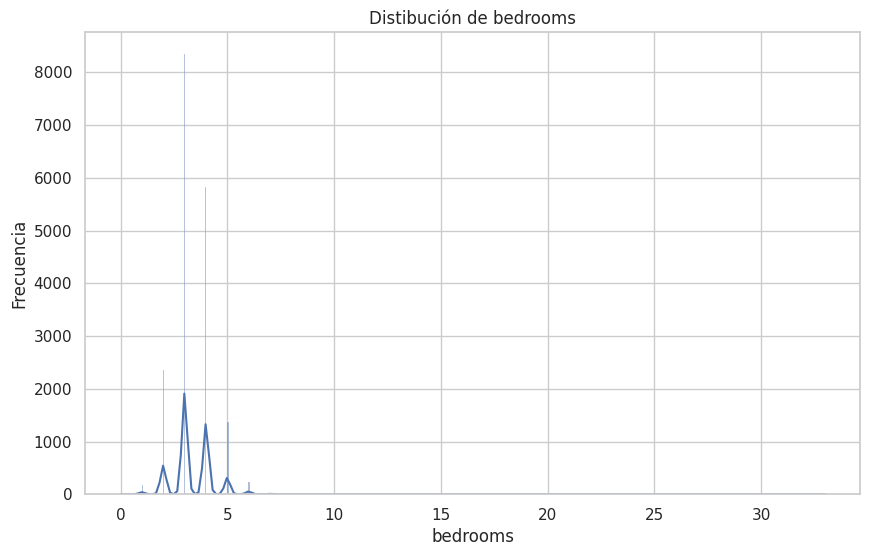

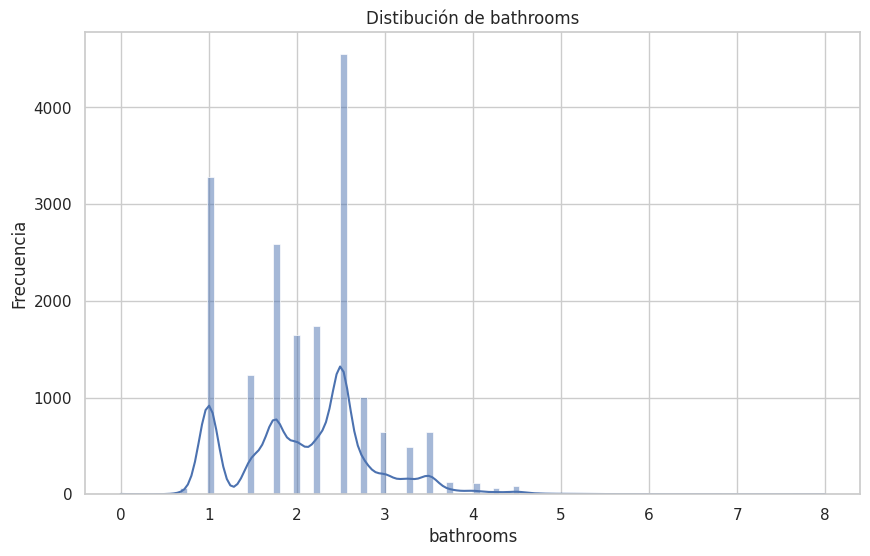

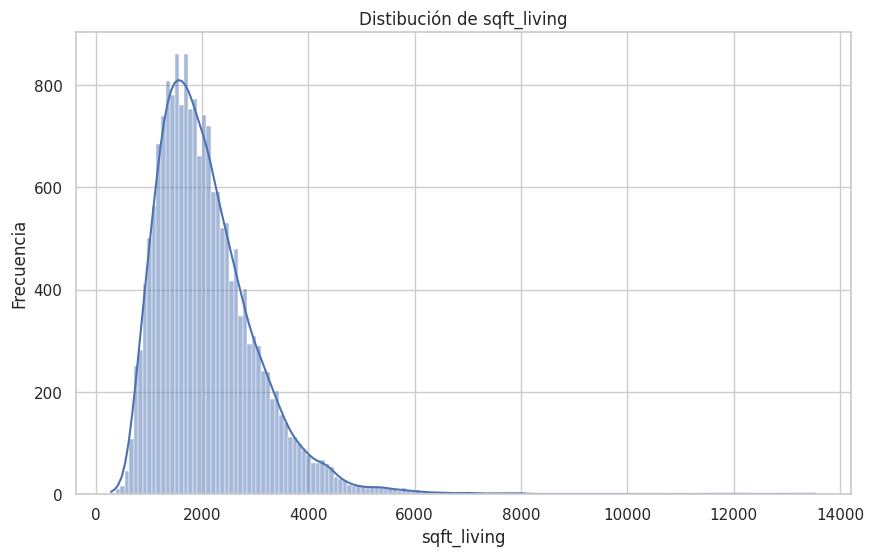

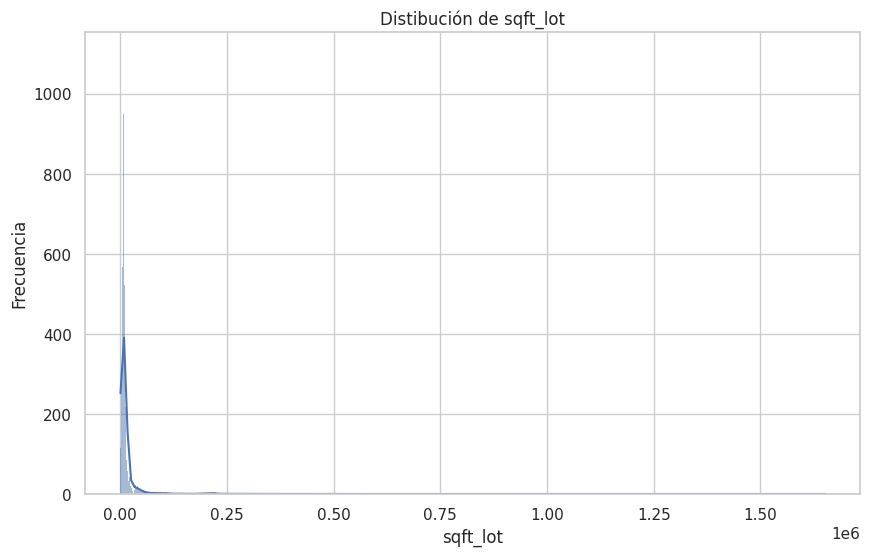

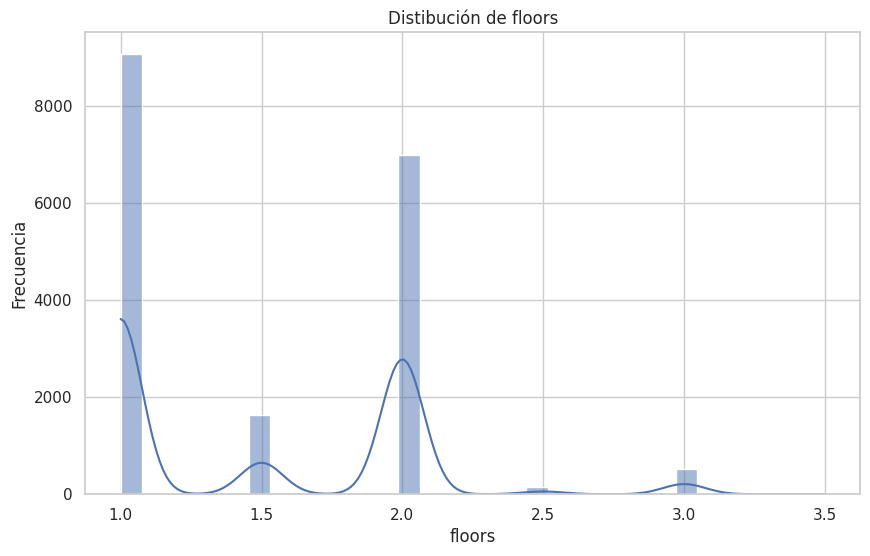

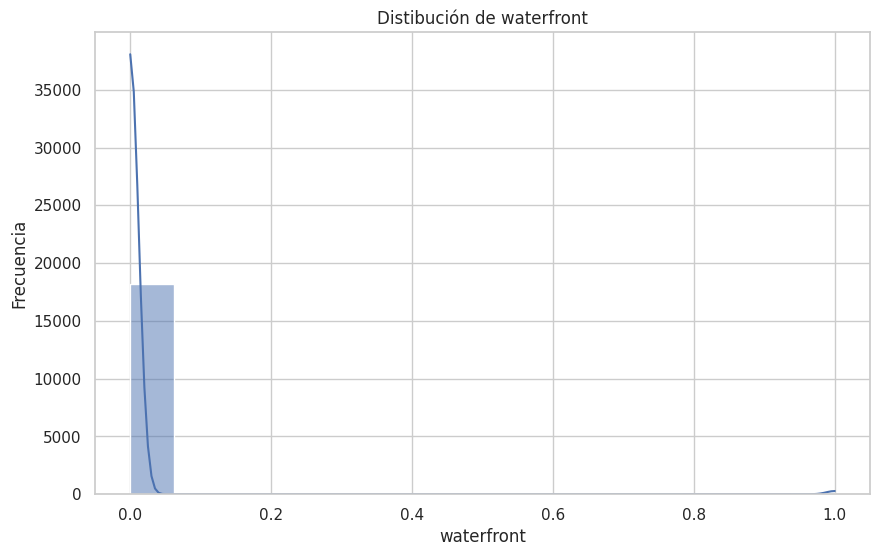

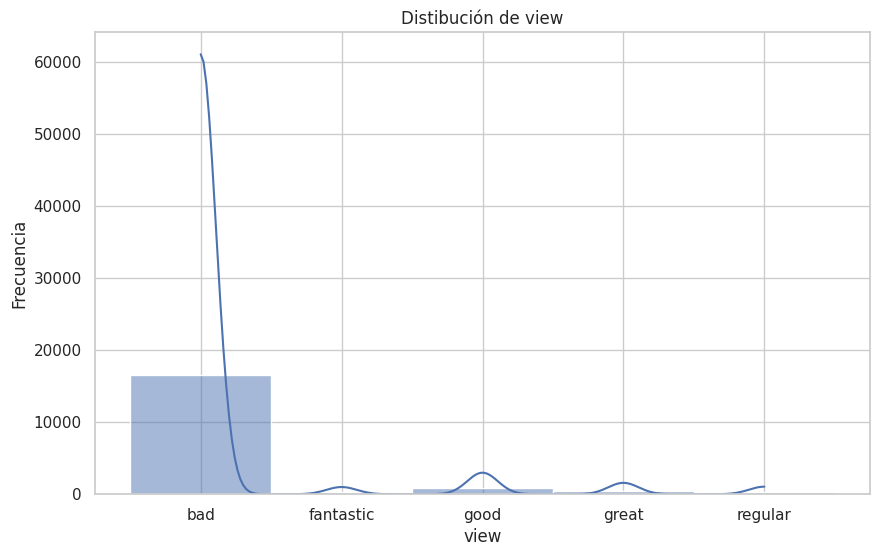

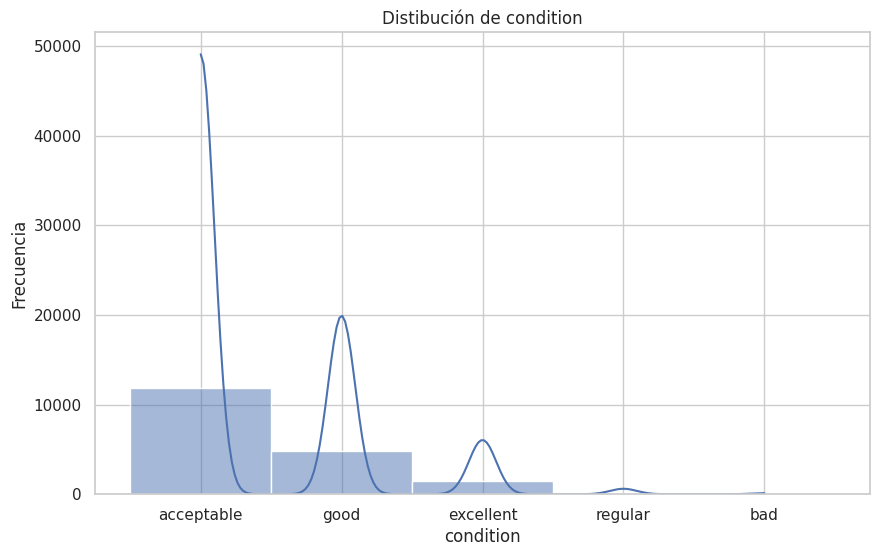

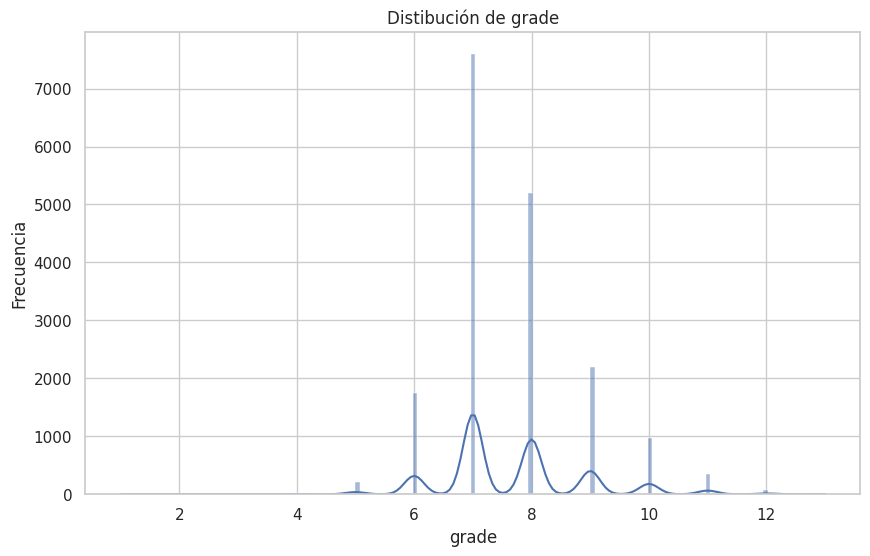

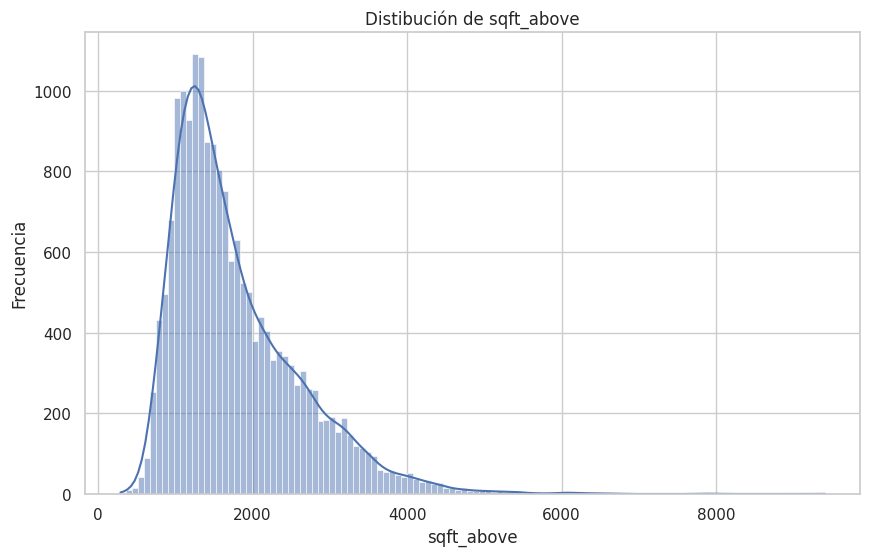

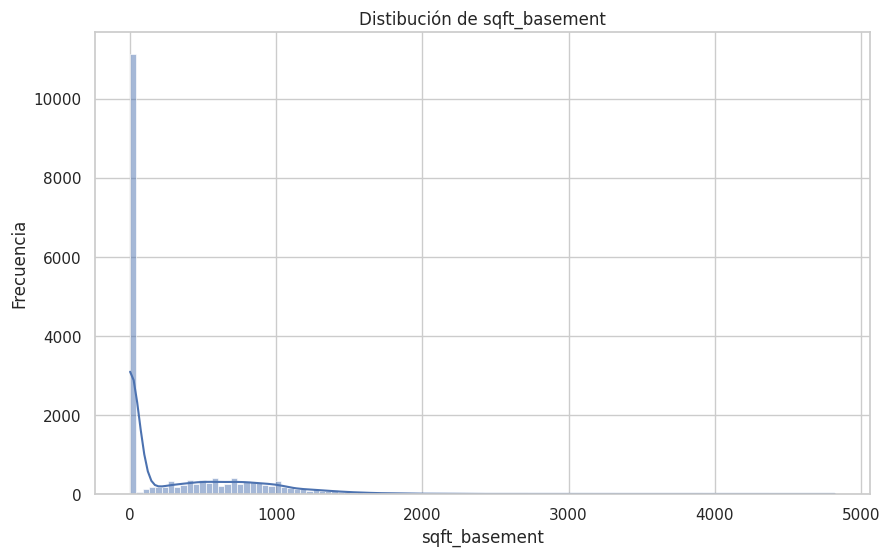

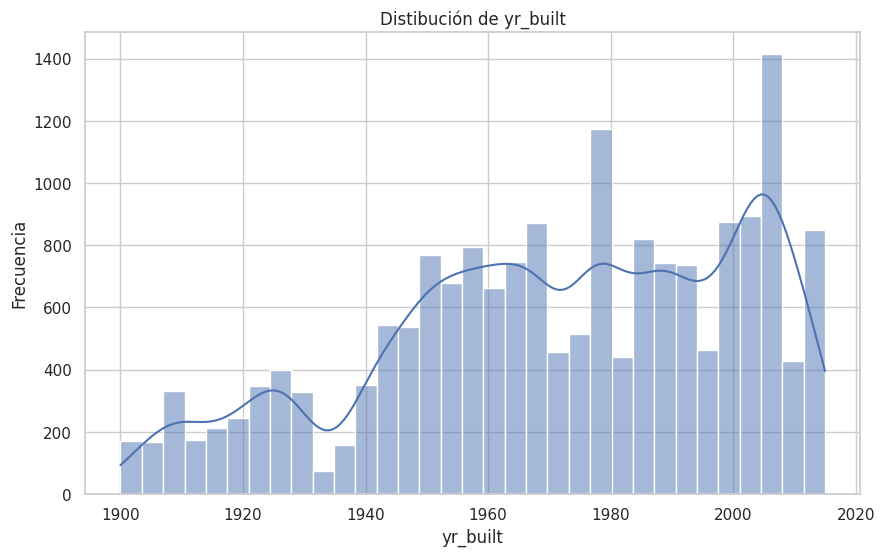

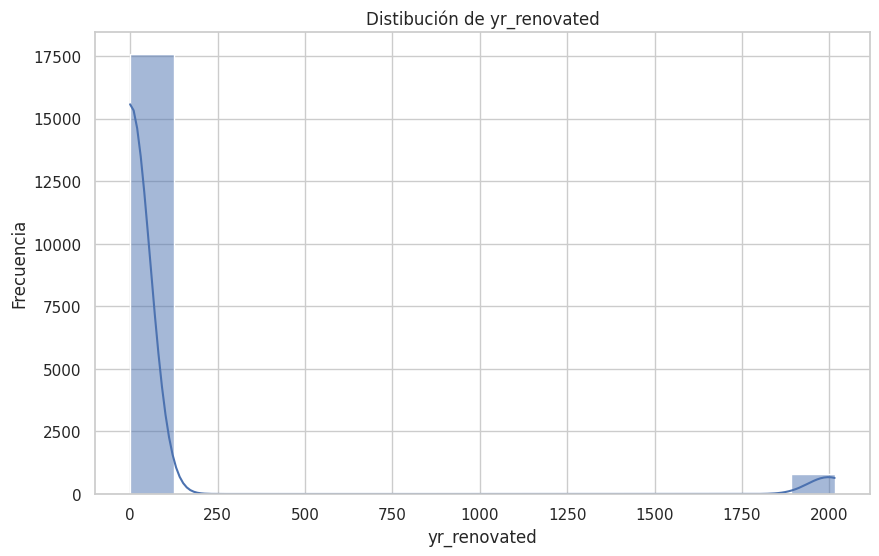

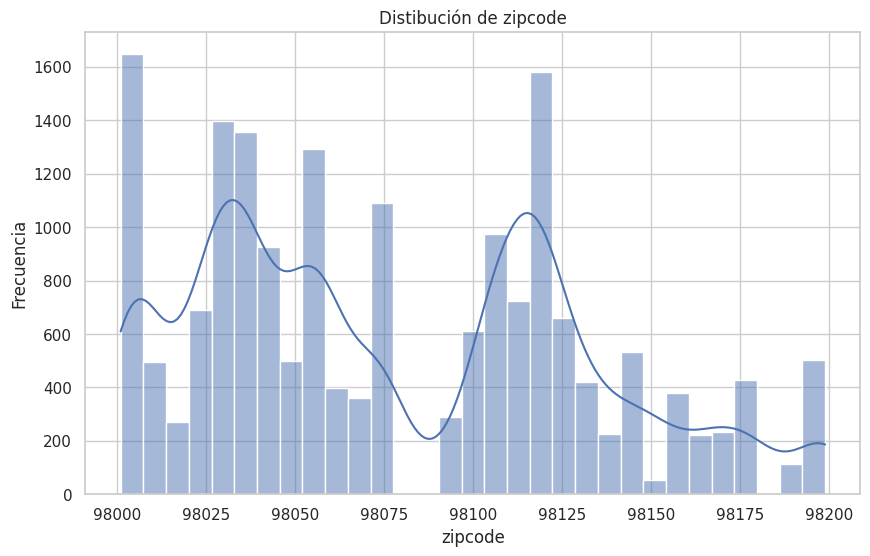

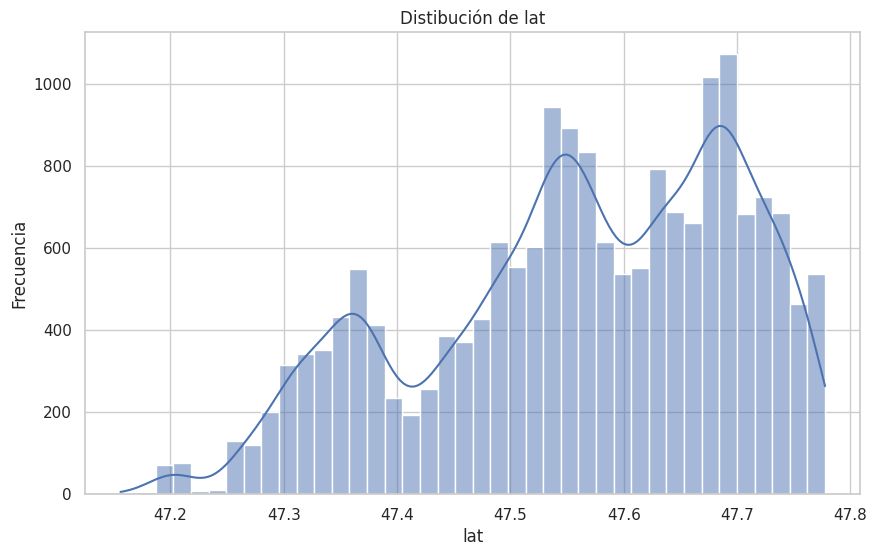

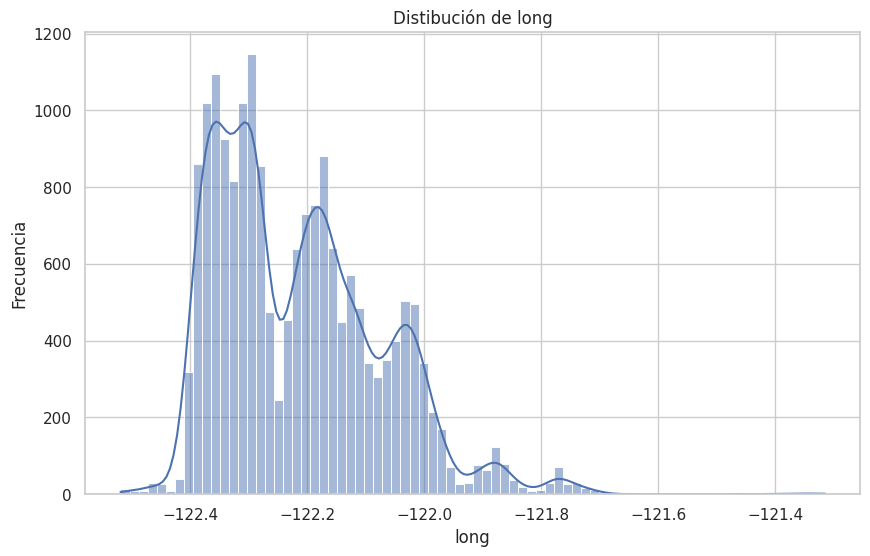

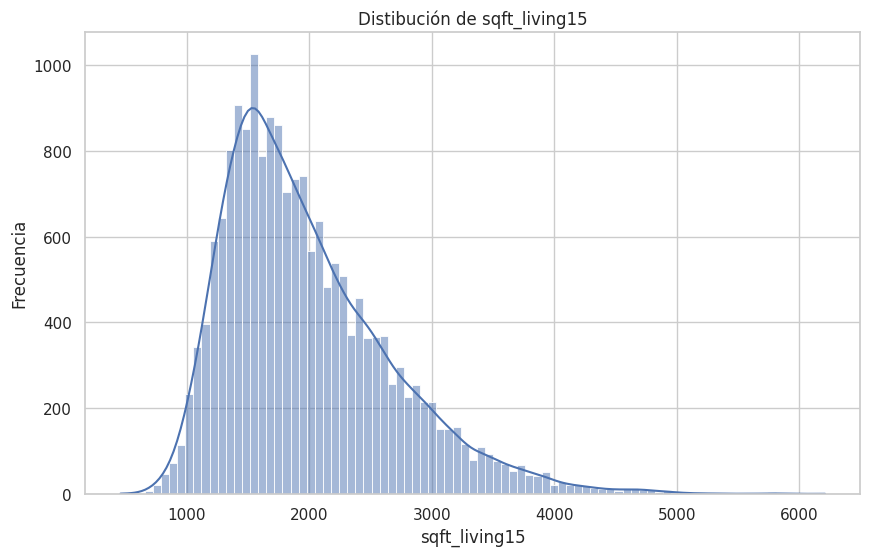

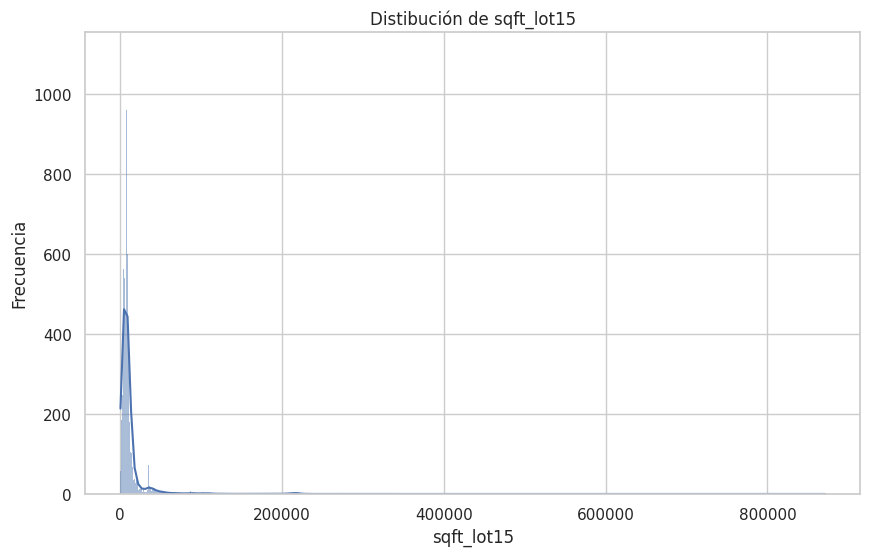

In [209]:
sns.set(style="whitegrid")
for column in train_data.columns:
  mostrarHistograma(train_data,column)

# Imputación de datos

In [210]:
train_data["yr_renovated"]=train_data["yr_renovated"].replace(0,np.nan)
test_data["yr_renovated"]=test_data["yr_renovated"].replace(0,np.nan)

In [211]:
train_data["yr_renovated"].fillna(train_data["yr_renovated"].median(),inplace=True)
test_data["yr_renovated"].fillna(test_data["yr_renovated"].median(),inplace=True)

In [212]:
train_data["yr_renovated"].describe()

count    18371.000000
mean      1999.835883
std          3.279754
min       1934.000000
25%       2000.000000
50%       2000.000000
75%       2000.000000
max       2015.000000
Name: yr_renovated, dtype: float64

# Detectando valores faltantes

In [213]:
def display_missing_value(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()),'. (',(df[col].isnull().sum()/df.shape[0])*100,'%)')
    print('\n')

In [214]:
display_missing_value(train_data)

id column missing values: 0 . ( 0.0 %)
price column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




In [215]:
display_missing_value(test_data)

id column missing values: 0 . ( 0.0 %)
bedrooms column missing values: 0 . ( 0.0 %)
bathrooms column missing values: 0 . ( 0.0 %)
sqft_living column missing values: 0 . ( 0.0 %)
sqft_lot column missing values: 0 . ( 0.0 %)
floors column missing values: 0 . ( 0.0 %)
waterfront column missing values: 0 . ( 0.0 %)
view column missing values: 0 . ( 0.0 %)
condition column missing values: 0 . ( 0.0 %)
grade column missing values: 0 . ( 0.0 %)
sqft_above column missing values: 0 . ( 0.0 %)
sqft_basement column missing values: 0 . ( 0.0 %)
yr_built column missing values: 0 . ( 0.0 %)
yr_renovated column missing values: 0 . ( 0.0 %)
zipcode column missing values: 0 . ( 0.0 %)
lat column missing values: 0 . ( 0.0 %)
long column missing values: 0 . ( 0.0 %)
sqft_living15 column missing values: 0 . ( 0.0 %)
sqft_lot15 column missing values: 0 . ( 0.0 %)




# Feature encoding

In [216]:
print("view:",train_data["view"].unique())
print("condition:",train_data["condition"].unique())
print("waterfront:",train_data["waterfront"].unique())
print("grade:",train_data["grade"].unique())

view: ['bad' 'fantastic' 'good' 'great' 'regular']
condition: ['acceptable' 'good' 'excellent' 'regular' 'bad']
waterfront: [0 1]
grade: [ 7  8 10  6  5  9 12 11 13  4  3  1]


**Diccionarios**
* **Recordatorio**: con grade estamos haciendo un haciendo codificación de enteros por que grade es un codificador con niveles claros con un significado. El frecuency enconding, no sirve por que aquí hay un orden coherente como significativo.

In [217]:
clean_up_view={"bad":1,"regular":2,"good":3,"great":4,"fantastic":5}
clean_up_condition={"bad":1,"regular":2,"acceptable":3,"good":4,"excellent":5}
#clean_up_waterfront={0:0,1:1}
clean_up_grade={grade: i+1 for i, grade in enumerate(sorted(train_data["grade"].unique()))}

Usar la función .map() en lugar de .replace garantiza lo siguiente: cuando un valor no coincide o no es encontrado pondra el valor NaN. Mientras, replace deja el valor como tal

In [218]:
train_data["view"]=train_data["view"].map(clean_up_view)
test_data["view"]=test_data["view"].map(clean_up_view)

In [219]:
train_data["condition"]=train_data["condition"].map(clean_up_condition)
test_data["condition"]=test_data["condition"].map(clean_up_condition)

# Escalado

In [220]:
#train_data["waterfront"].fillna(train_data["waterfront"].mode()[0],inplace=True)
#test_data["waterfront"].fillna(test_data["waterfront"].mode()[0],inplace=True)

**Variables númericas**

In [221]:
train_data["bedrooms"].fillna(train_data["bedrooms"].mode()[0],inplace=True)
test_data["bedrooms"].fillna(test_data["bedrooms"].mode()[0],inplace=True)

In [222]:
train_data["bathrooms"].fillna(train_data["bathrooms"].mode()[0],inplace=True)
test_data["bathrooms"].fillna(test_data["bathrooms"].mode()[0],inplace=True)

In [223]:
train_data["sqft_living"].fillna(train_data["sqft_living"].mode()[0],inplace=True)
test_data["sqft_living"].fillna(test_data["sqft_living"].mode()[0],inplace=True)

In [224]:
train_data["sqft_lot"].fillna(train_data["sqft_lot"].mode()[0],inplace=True)
test_data["sqft_lot"].fillna(test_data["sqft_lot"].mode()[0],inplace=True)

In [225]:
train_data["floors"].fillna(train_data["floors"].mode()[0],inplace=True)
test_data["floors"].fillna(test_data["floors"].mode()[0],inplace=True)

In [226]:
train_data["sqft_above"].fillna(train_data["sqft_above"].mode()[0],inplace=True)
test_data["sqft_above"].fillna(test_data["sqft_above"].mode()[0],inplace=True)

In [227]:
train_data["sqft_basement"].fillna(train_data["sqft_basement"].mode()[0],inplace=True)
test_data["sqft_basement"].fillna(test_data["sqft_basement"].mode()[0],inplace=True)

In [228]:
train_data["yr_built"].fillna(train_data["yr_built"].mode()[0],inplace=True)
test_data["yr_built"].fillna(test_data["yr_built"].mode()[0],inplace=True)

In [229]:
train_data["yr_renovated"].fillna(train_data["yr_renovated"].mode()[0],inplace=True)
test_data["yr_renovated"].fillna(test_data["yr_renovated"].mode()[0],inplace=True)

In [230]:
train_data["zipcode"].fillna(train_data["zipcode"].mode()[0],inplace=True)
test_data["zipcode"].fillna(test_data["zipcode"].mode()[0],inplace=True)

In [231]:
train_data["lat"].fillna(train_data["lat"].mode()[0],inplace=True)
test_data["lat"].fillna(test_data["lat"].mode()[0],inplace=True)

In [232]:
train_data["long"].fillna(train_data["long"].mode()[0],inplace=True)
test_data["long"].fillna(test_data["long"].mode()[0],inplace=True)

In [233]:
train_data["sqft_living15"].fillna(train_data["sqft_living15"].mode()[0],inplace=True)
test_data["sqft_living15"].fillna(test_data["sqft_living15"].mode()[0],inplace=True)

In [234]:
train_data["sqft_lot15"].fillna(train_data["sqft_lot15"].mode()[0],inplace=True)
test_data["sqft_lot15"].fillna(test_data["sqft_lot15"].mode()[0],inplace=True)

Estandarizando usando z-score -> recuerda usamos standardScaler en lugar de un procedimiento

In [235]:
scaler=StandardScaler()

In [236]:
array_features_numericos=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [237]:
train_data[array_features_numericos]=scaler.fit_transform(train_data[array_features_numericos])
test_data[array_features_numericos]=scaler.transform(test_data[array_features_numericos])

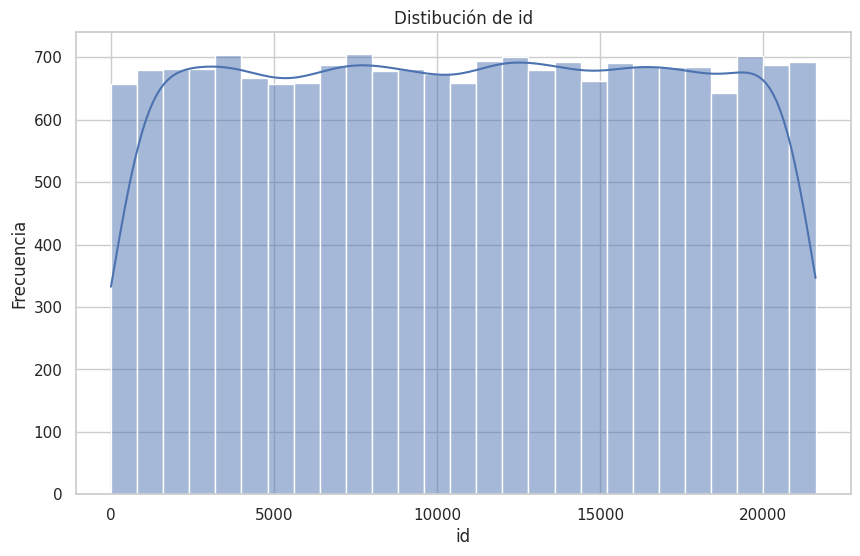

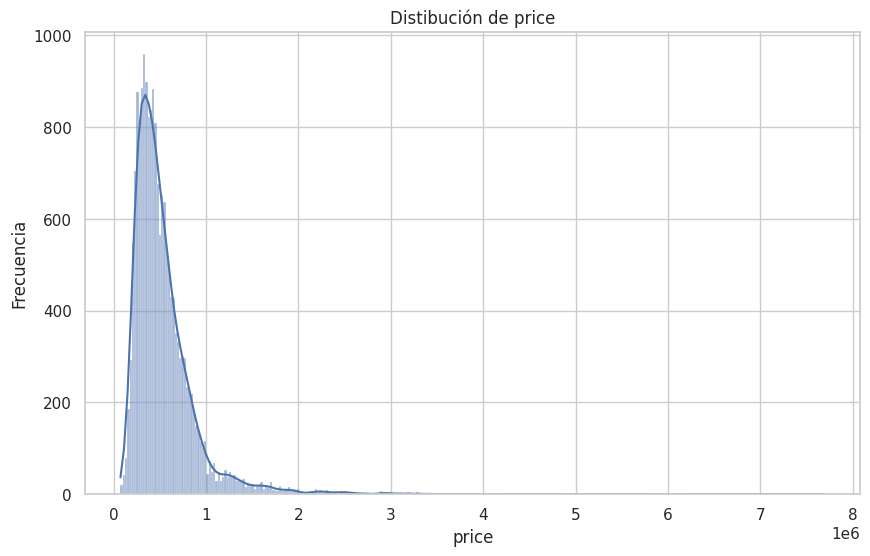

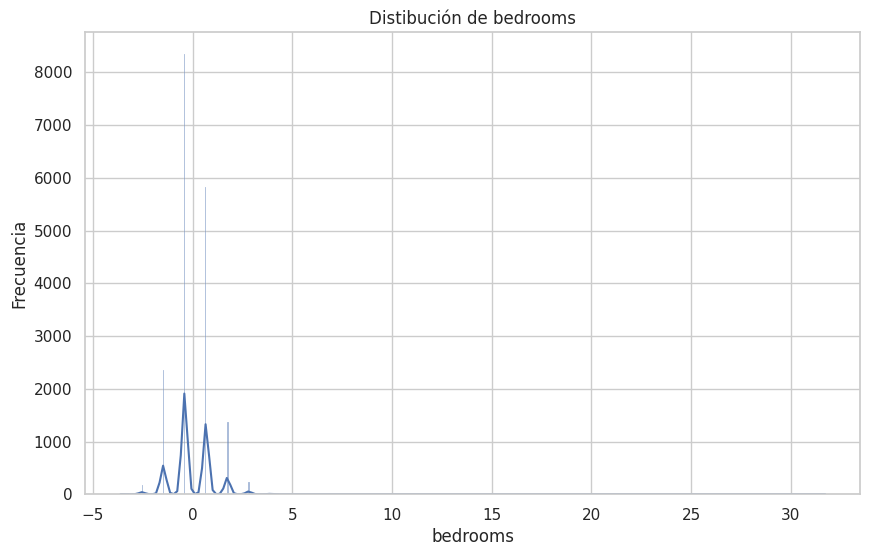

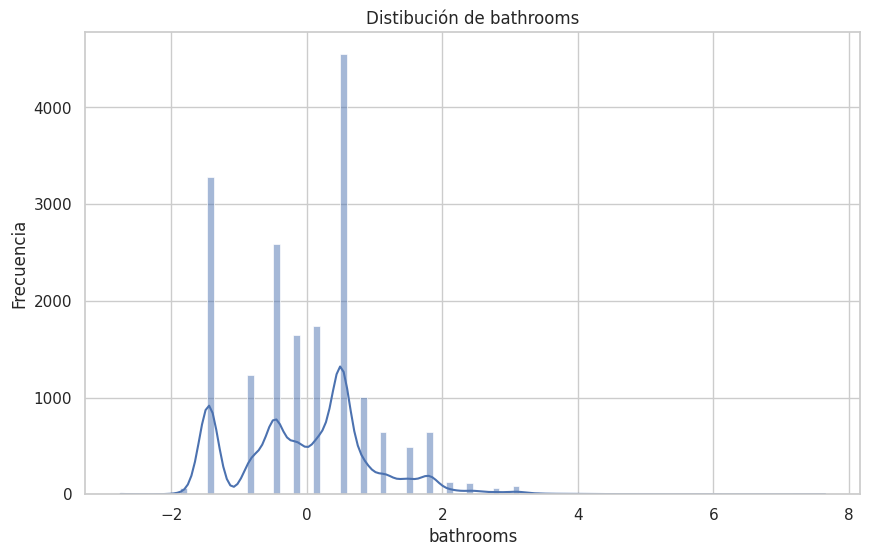

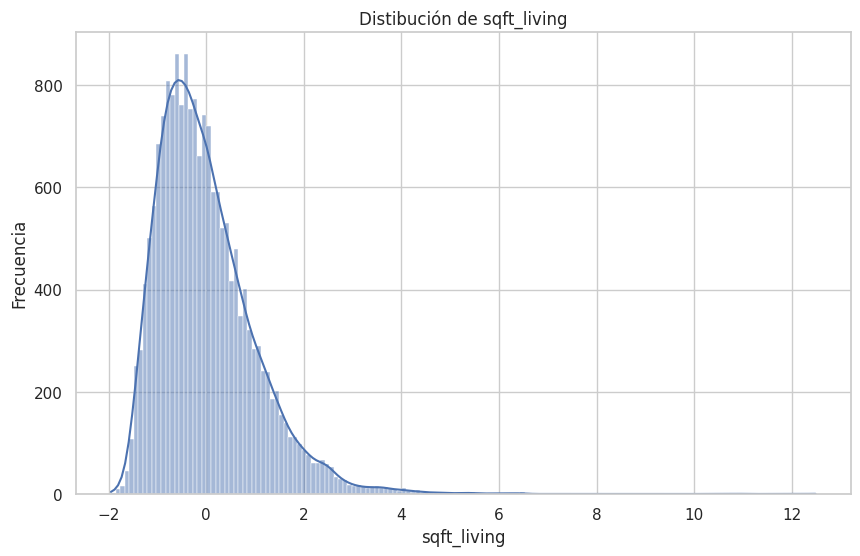

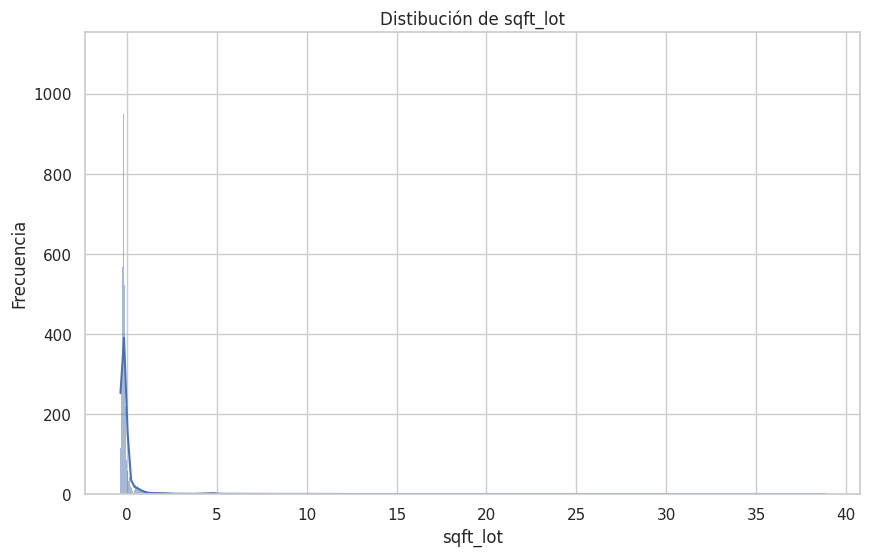

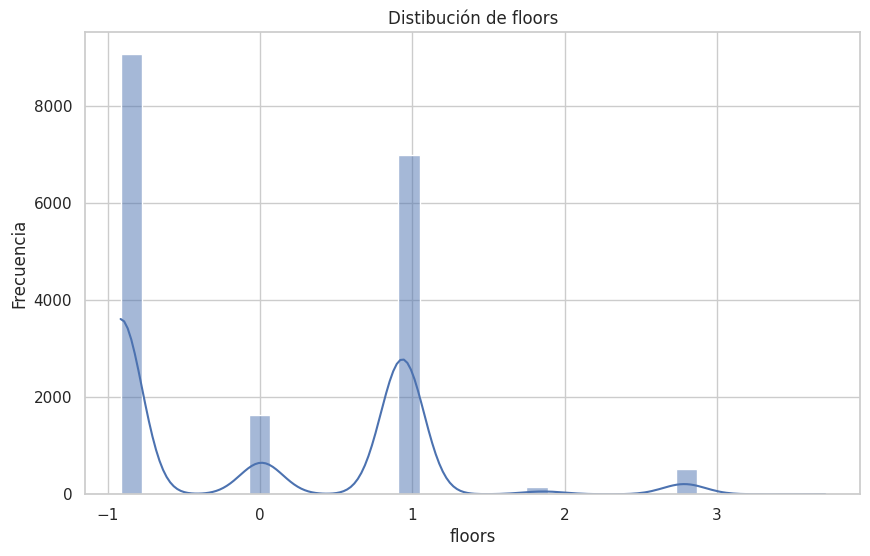

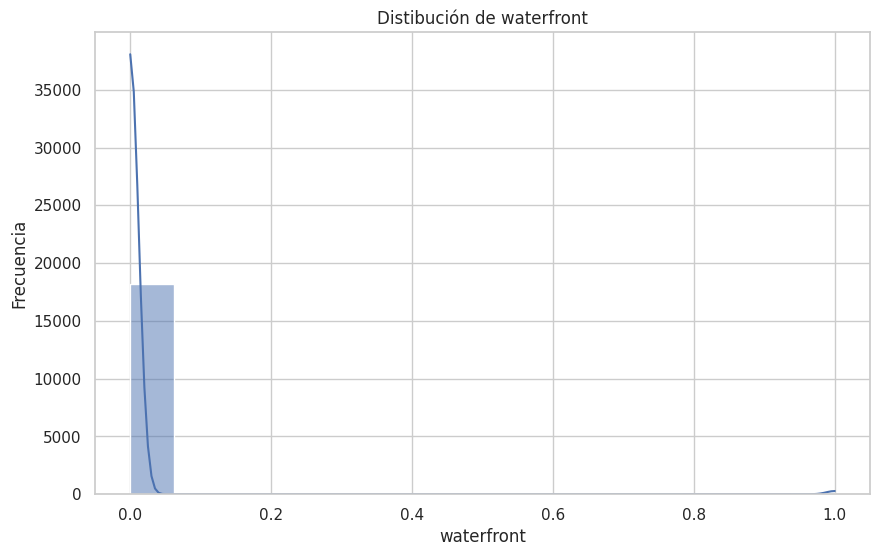

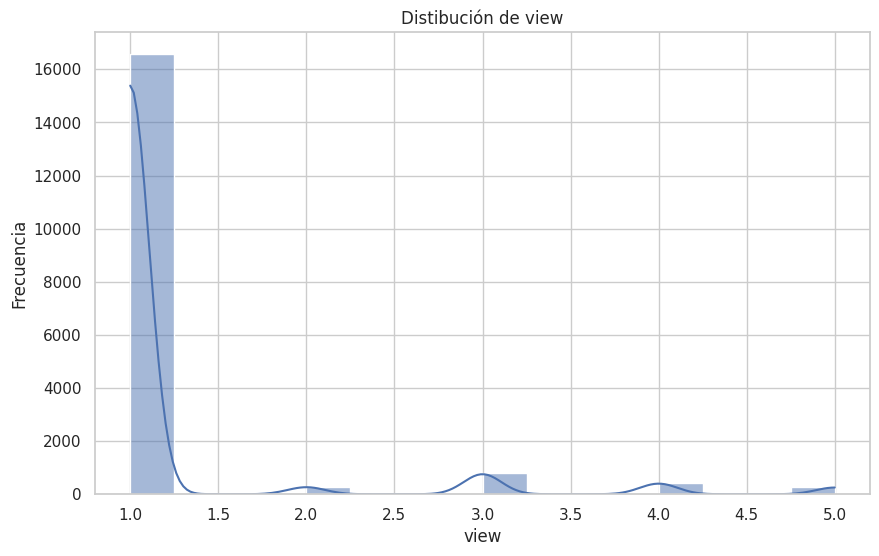

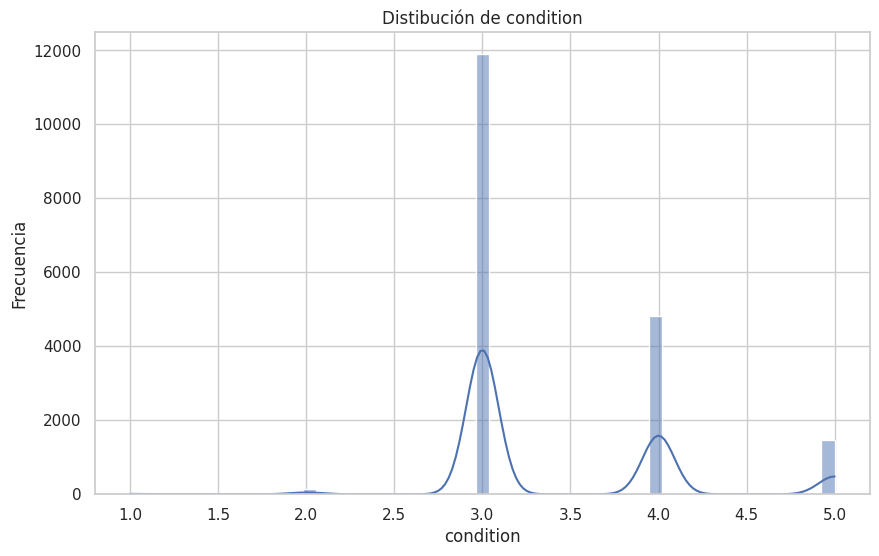

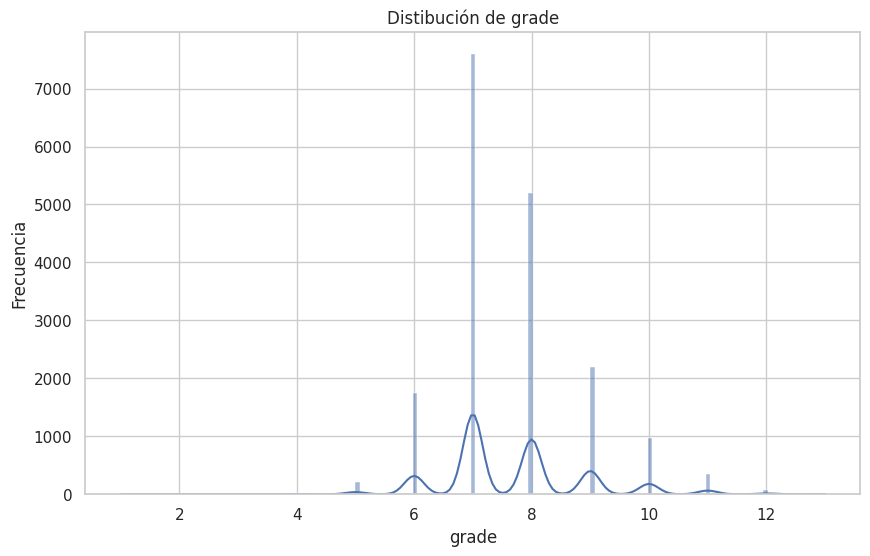

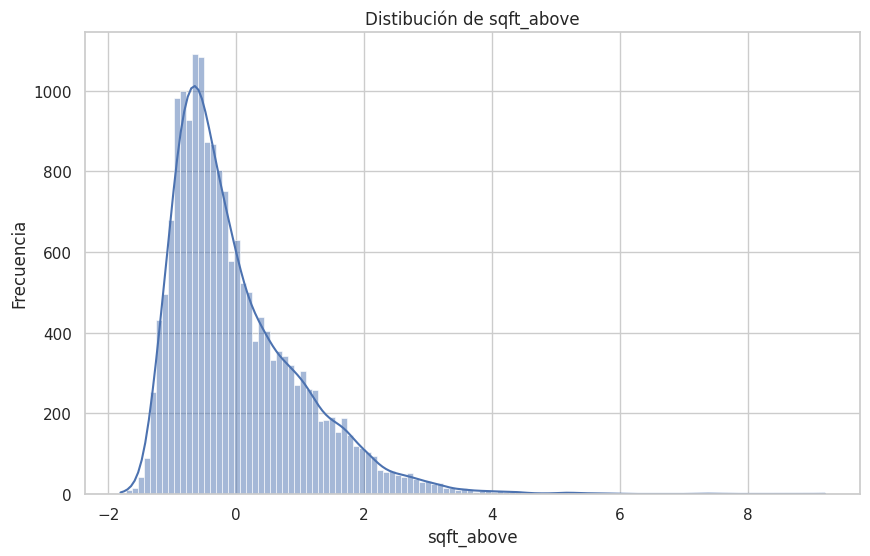

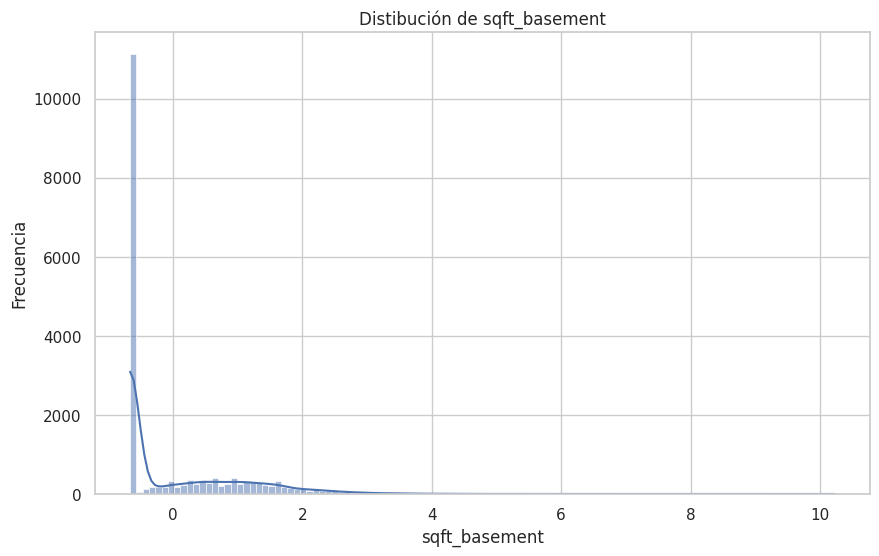

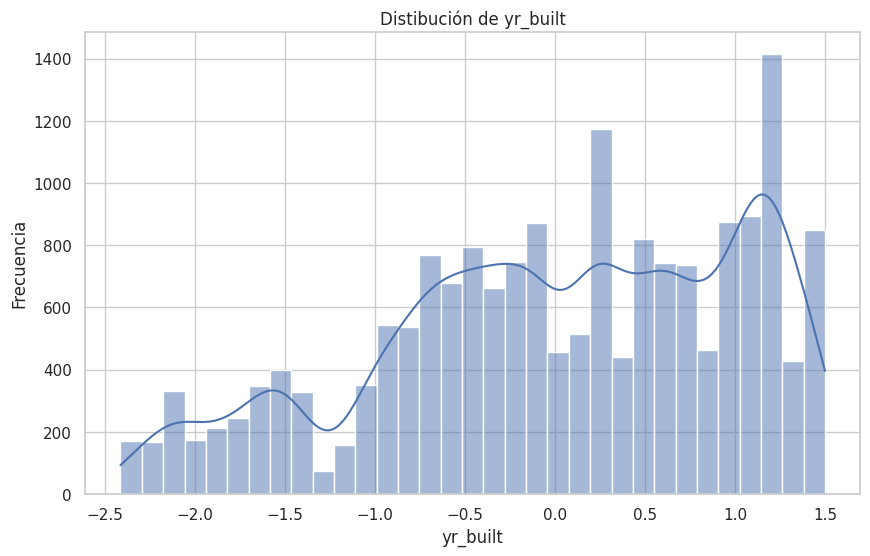

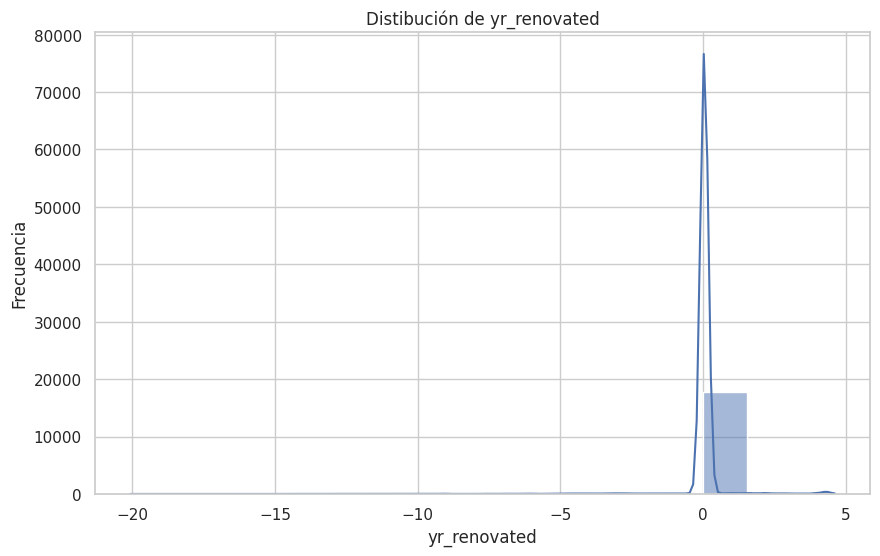

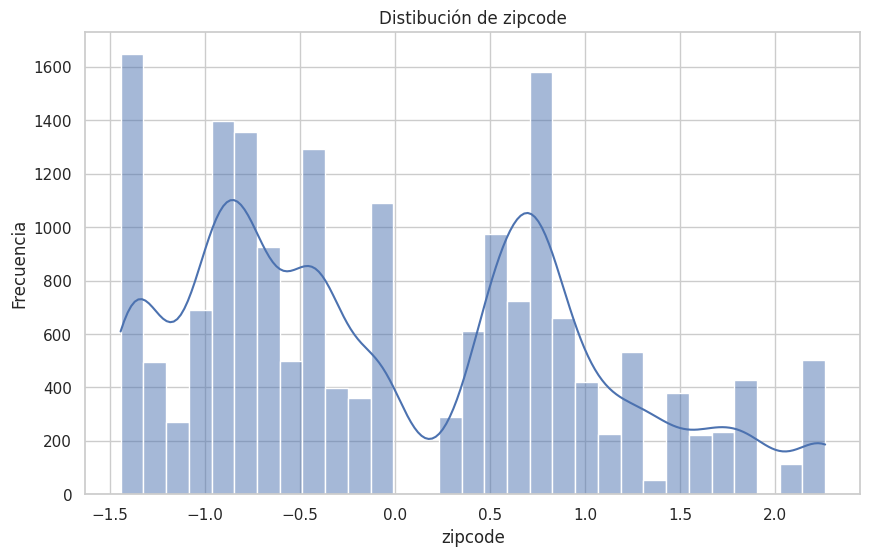

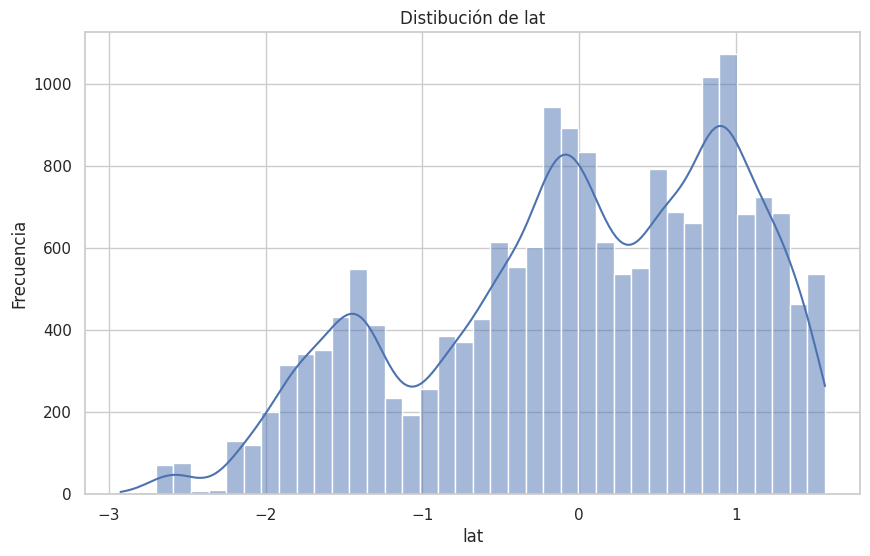

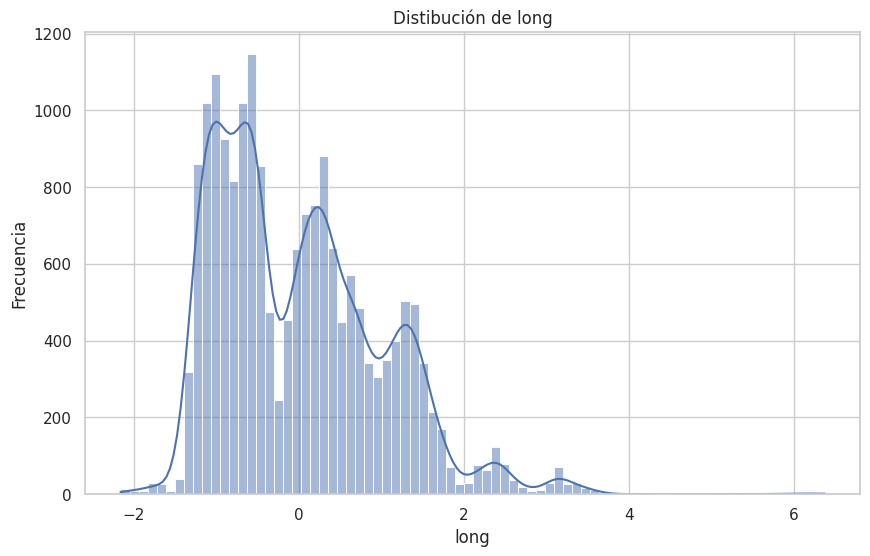

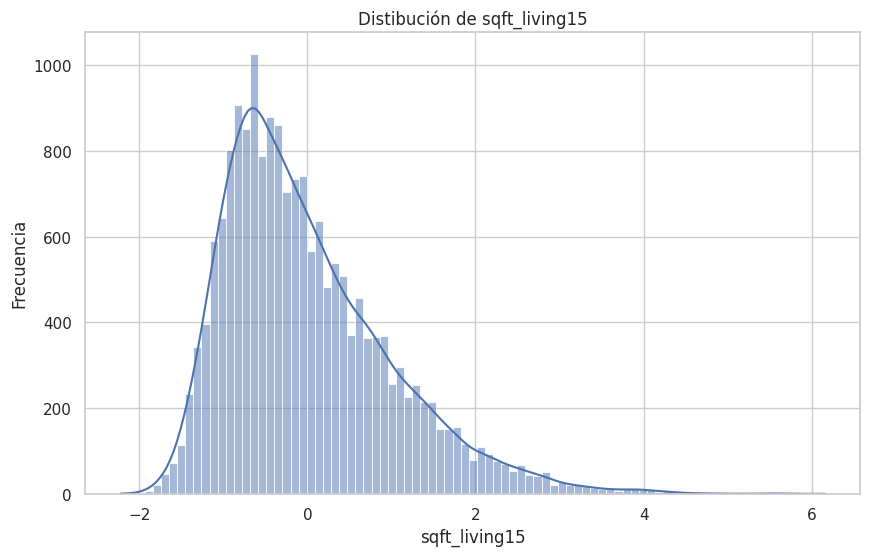

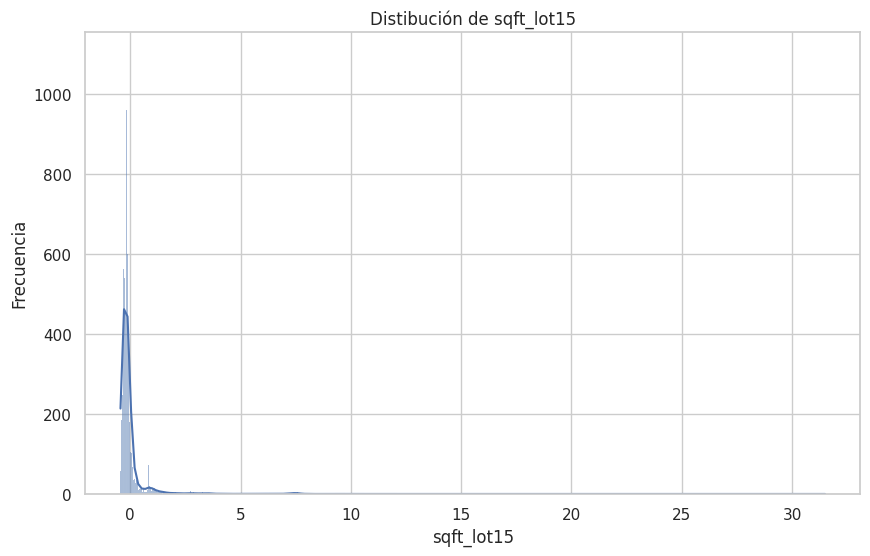

In [238]:
sns.set(style="whitegrid")
for column in train_data.columns:
  mostrarHistograma(train_data,column)

# Verificando correlación

In [239]:
def identificarCorrelacion(dataset):
  f = dataset.corr()
  mask=np.triu(np.ones_like(f))
  #Ajustando el tamaño para que se vea mejor
  plt.figure(figsize=[18,11])
  sns.heatmap(f,annot=True,cmap="coolwarm",mask=mask,fmt=".2f",square=True, linewidths=.6)
  plt.title("Matriz de Correlación")
  plt.show()

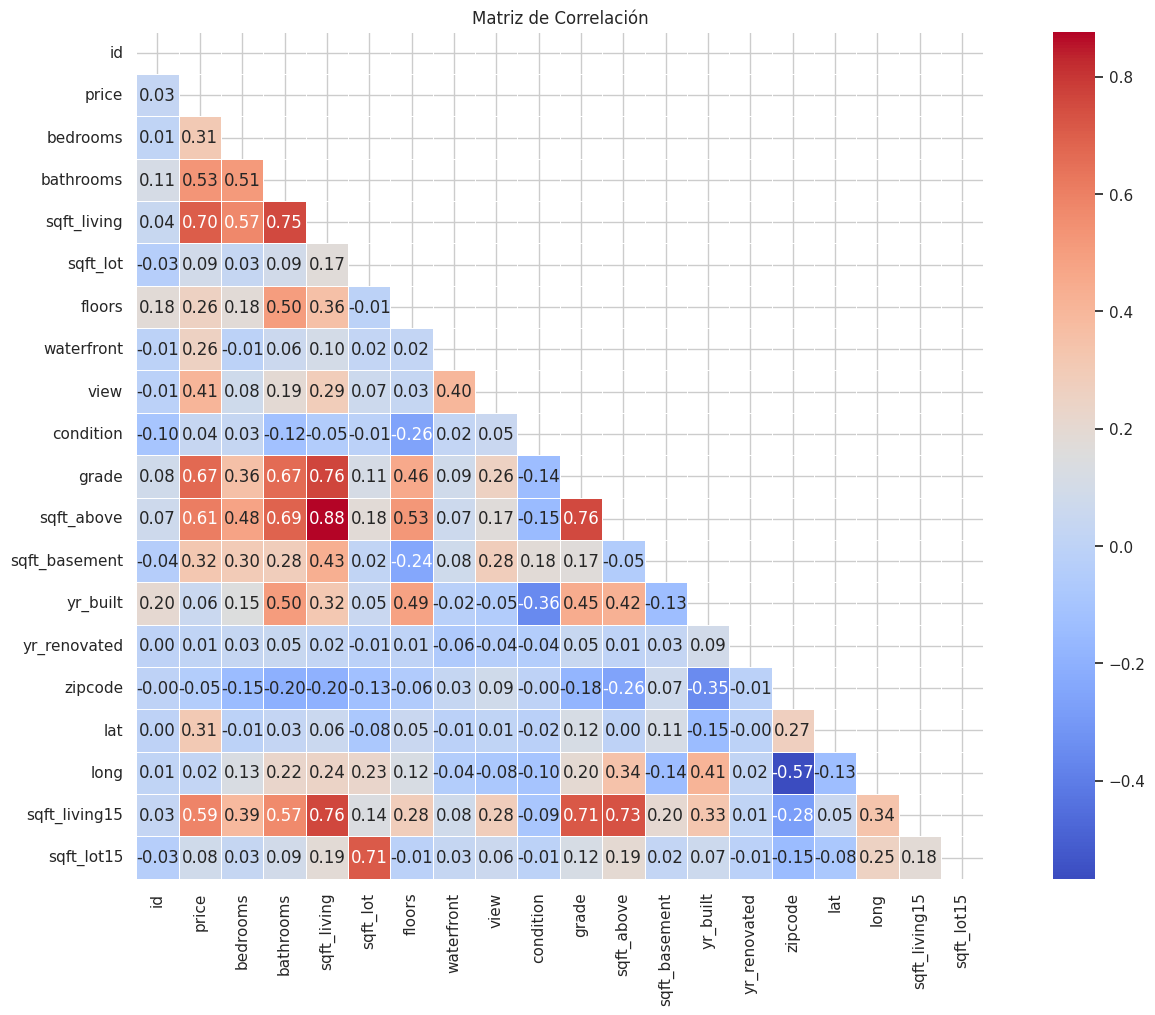

In [240]:
identificarCorrelacion(train_data)

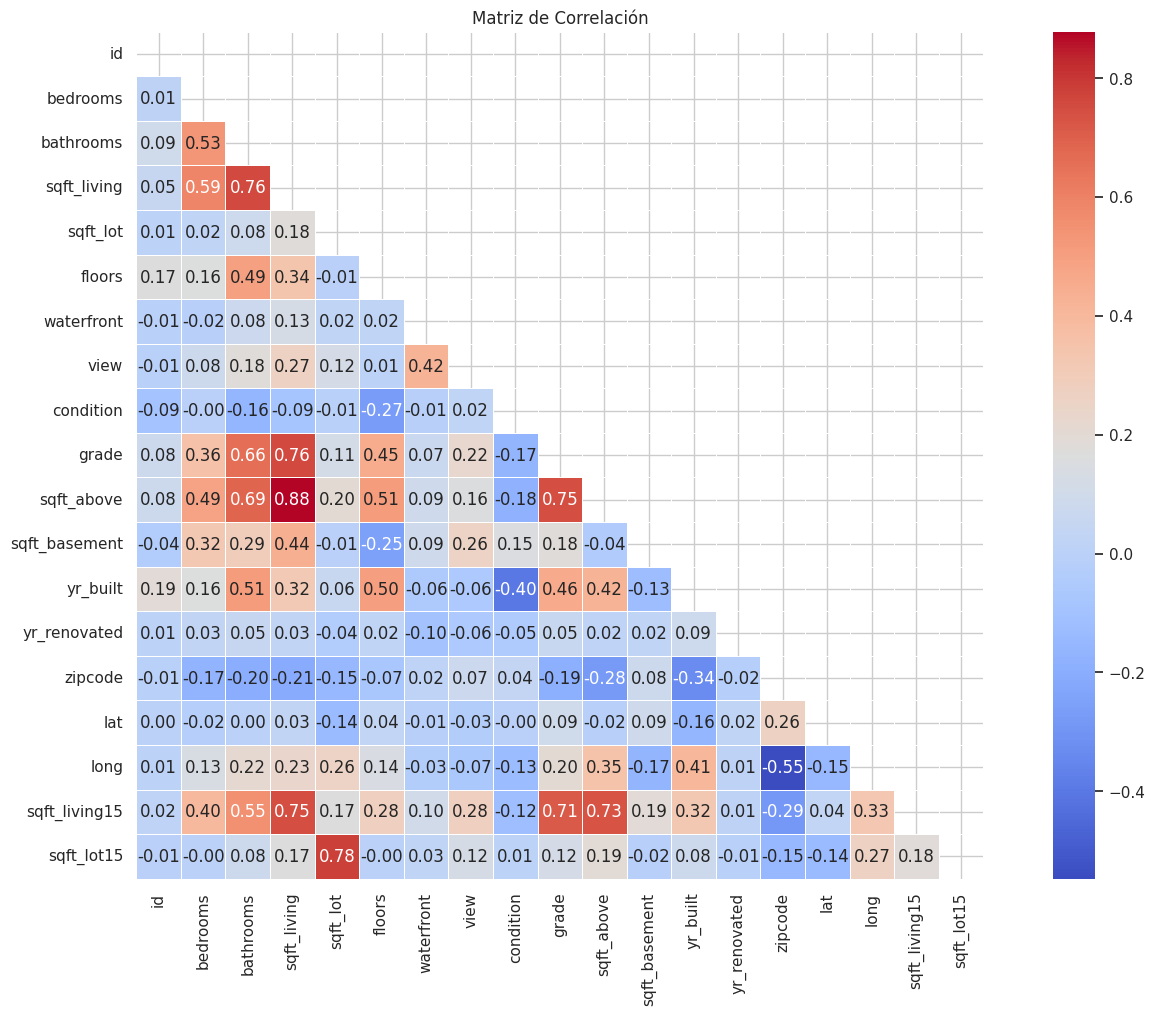

In [241]:
identificarCorrelacion(test_data)

# Agregando caracteristicas derivadas

In [242]:
train_data["since_built"]=2024-train_data["yr_built"].fillna(0)
test_data["since_built"]=2024-test_data["yr_built"].fillna(0)

In [243]:
train_data=train_data.drop("yr_built",axis=1)
test_data=test_data.drop("yr_built",axis=1)

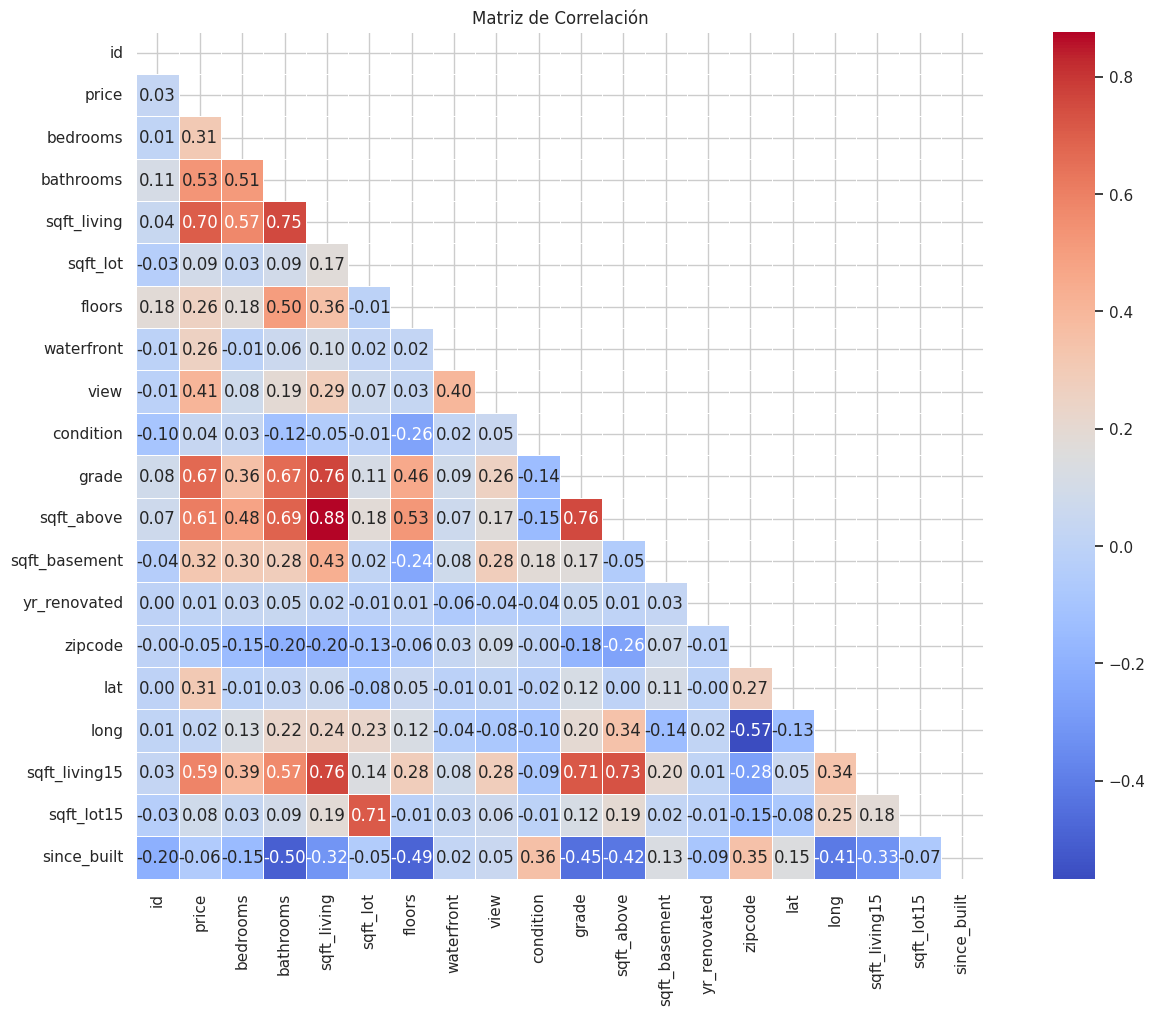

In [244]:
identificarCorrelacion(train_data)

In [245]:
train_data=train_data.drop(columns=["zipcode","yr_renovated"],axis=1)
test_data=test_data.drop(columns=["zipcode","yr_renovated"],axis=1)

# Entrenando modelo

In [246]:
x=train_data.drop(columns=["id","price"])
y=train_data["price"]
x_test=test_data.drop(columns=["id"])

In [247]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [248]:
x_test=x_test.reindex(columns=X_train.columns,fill_value=0)

In [249]:
#Entrenar el modelo
modelLR = LinearRegression().fit(X_train,y_train)
# Efectuar Prediccion
y_pred = modelLR.predict(X_val)

#Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')
print("Mean square error: ", mean_squared_error(y_val,y_pred))
print("Mean absolute error: ", mean_absolute_error(y_val,y_pred))
print("Mean square error: ", r2_score(y_val,y_pred))


RMSE: 202601.59667706478
Mean square error:  41047406976.09603
Mean absolute error:  127046.05358605112
Mean square error:  0.7296514958860087


In [250]:
polyfit = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = polyfit.fit_transform(X_train)
x_test_poly1 = polyfit.fit_transform(X_val)
x_test_poly2 = polyfit.fit_transform(x_test)
lrpoly=LinearRegression()
lrpoly.fit(x_train_poly,y_train)
y_pred=lrpoly.predict(x_test_poly1)
#Evaluamos el modelo
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')
print("Mean square error: ", mean_squared_error(y_val, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_val, y_pred))
print("R2 score: ", r2_score(y_val, y_pred))


y_pred=lrpoly.predict(x_test_poly2)

RMSE: 154618.62188746882
Mean square error:  23906918234.380054
Mean absolute error:  102695.24868269662
R2 score:  0.8425430481783175


In [253]:
# Entrenamiento del modelo
#Ajustara el código de la siguiente forma:
#n_estimators: cantidad de arboles a construir (puede llevar a overfiting), valores tipicos son 100,500,1000,2000
#learning_rate: ajustar los pesos de los arboles (tasa de aprendizaje). valor tipicos 0.01,0.05,0.1,0.2
#max_depth: profundidad máxima de cada árbol (puede llevar a overfiting) valores tipicos 3,5,7,9,11
#subsample: proporciones de muestras utilizadas para construir arboles (ayuda a evitar sobreajuste) valores tipicos 0.6,0.7,0.8,0.9,1
#solsample_bytree: cantidad de columnas utilizadas para construir el arbol, aqui usamos caracteristicas. Valores tipicos son 0.6,0.70.9,1
#random_state: crea una semilla de aleatoridad fija de reproducción
model = XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=5,subsample=0.7,colsample_bytree=0.7,random_state=42)
model.fit(X_train, y_train)

# Evaluación en el set de validación
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')
print("Mean square error: ", mean_squared_error(y_val, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_val, y_pred))
print("R2 score: ", r2_score(y_val, y_pred))

# Predicciones en el set de evaluación
y_test_pred = model.predict(x_test)

RMSE: 110999.74488851539
Mean square error:  12320943365.315496
Mean absolute error:  66120.07684983678
R2 score:  0.9188511807816258


# Generando el archivo de evaluación

In [252]:
# Generación del archivo de submission
resultado = pd.DataFrame({'id': test_data['id'], 'value': y_test_pred})
resultado.to_csv('resultado_definitivo.csv', index=False)